# Car price prediction
---

- Author: Masud Rahman (masud90.github.io)
- Dataset: Car Price Prediction Multiple Linear Regression (https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data)

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Structure of the Notebook
1. Data Loading and Understanding
    - Load the dataset
    - Load the data dictionary
    - Display the first few rows of the dataset

2. Data Exploration
    - Summary statistics
    - Data types and missing values
    - Distribution of the target variable
    - Exploratory data analysis (EDA)

3. Data Preprocessing
    - Handling missing values
    - Encoding categorical variables
    - Feature scaling
    - Splitting the data into training and testing sets

4. Model Building
    - Building the multiple linear regression model
    - Checking assumptions of linear regression
    - Model evaluation metrics

5. Model Interpretation
    - Significant variables
    - Impact of variables on the car price

## Initialize setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style(style='whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data loading and understanding

In [6]:
# Load the dataset
data = pd.read_csv('CarPrice_Assignment.csv')

# Shape of dataset
print("The dataset shape is {}".format(data.shape))

# Display the first few rows of the dataset
data.head()

The dataset shape is (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data exploration

In [8]:
# Summary statistics (numerical variables)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [9]:
# Data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
# Do not need ID variable for analysis
data.drop(columns=['car_ID'], inplace=True)

In [11]:
# Do not need car model, just need the manufacturer.

# Step 1: Split the CarName column by the first space
data['Manufacturer'] = data['CarName'].apply(lambda x: x.split(' ')[0])

# Step 2: Drop the CarName column
data.drop(columns=['CarName'], inplace=True)

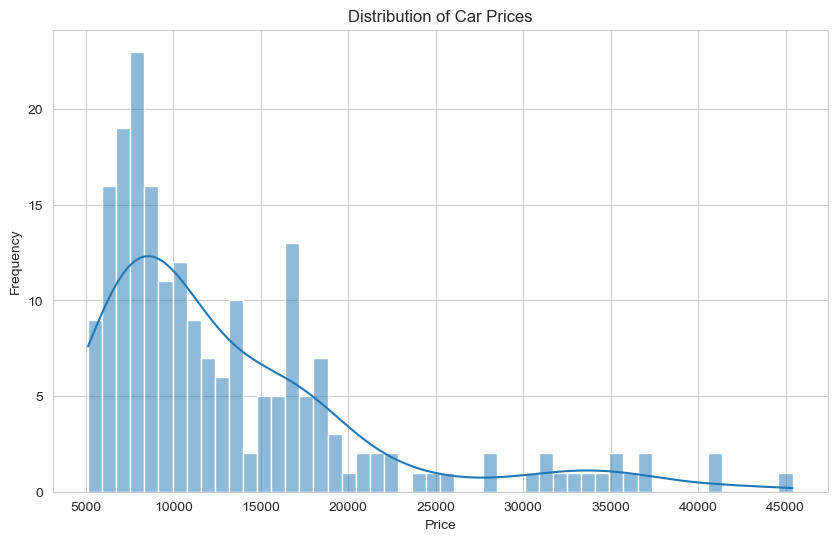

In [12]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

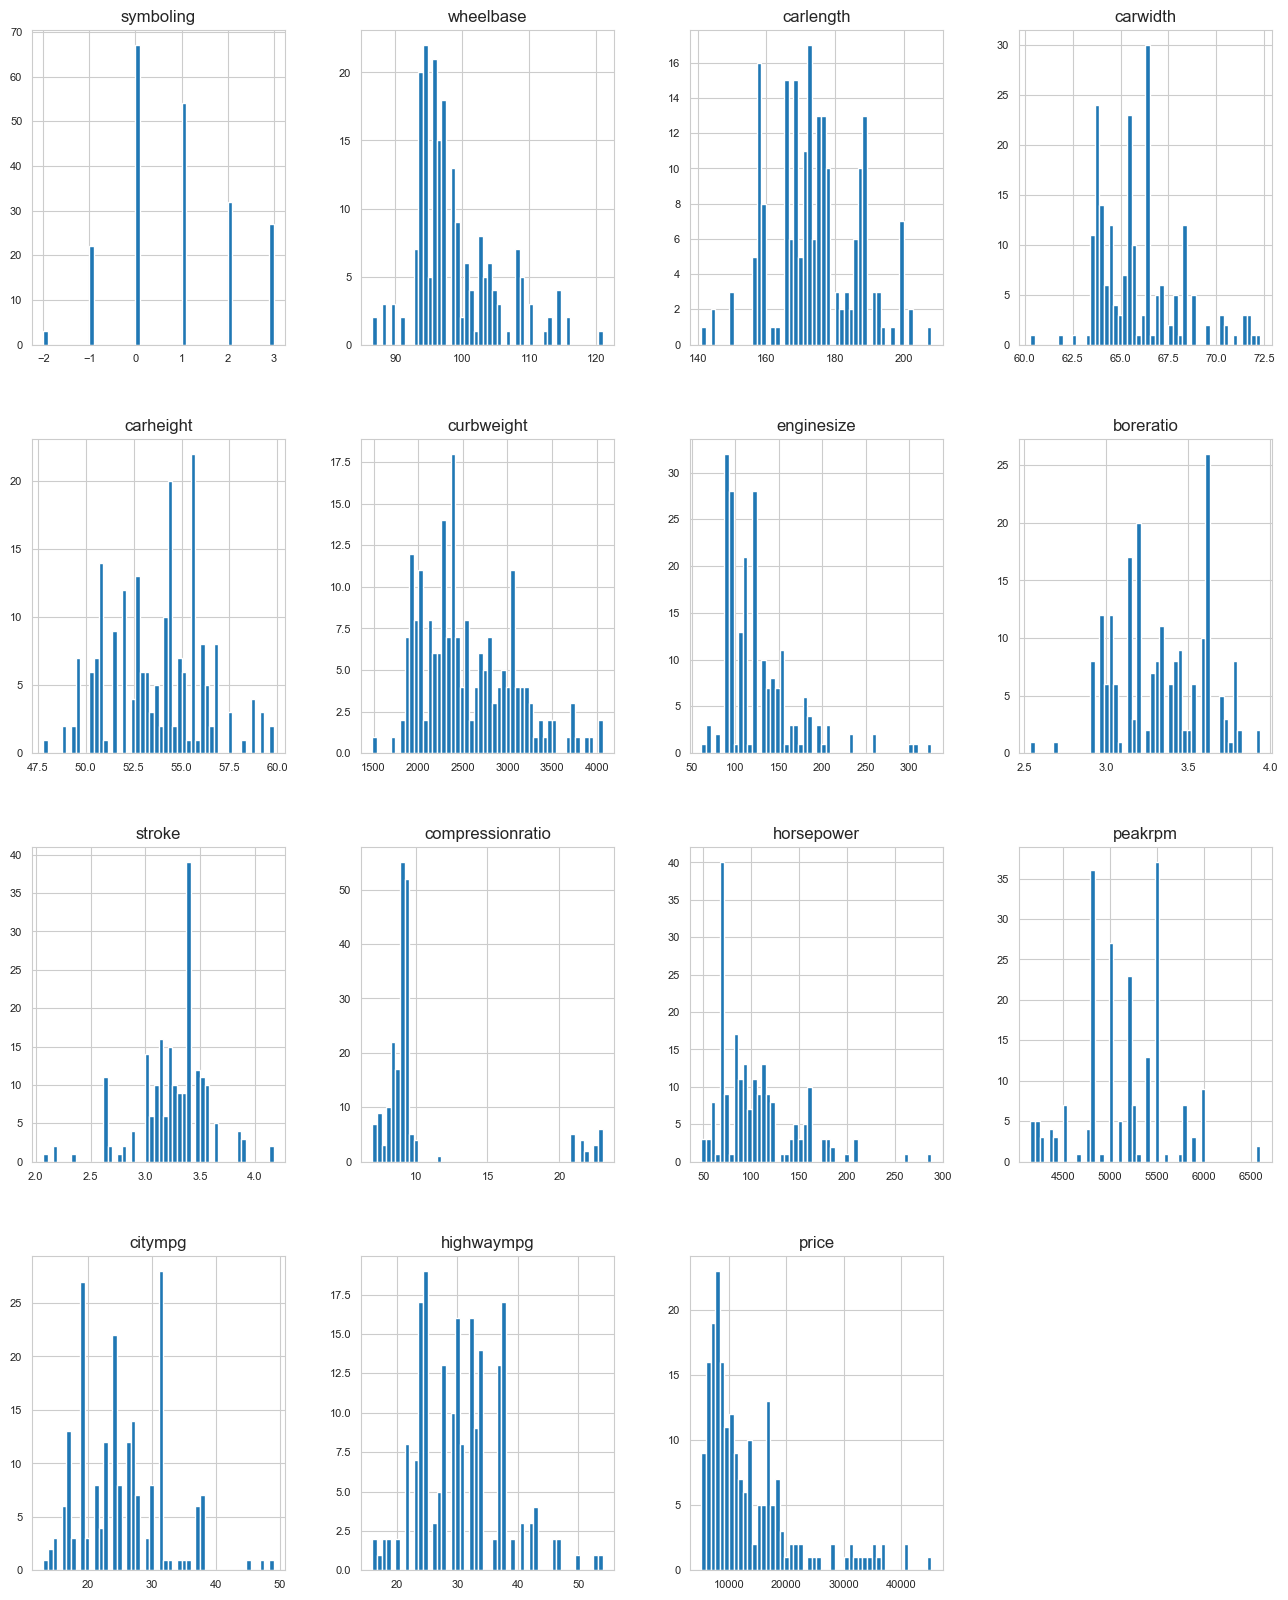

In [13]:
# Numerical data distribution
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

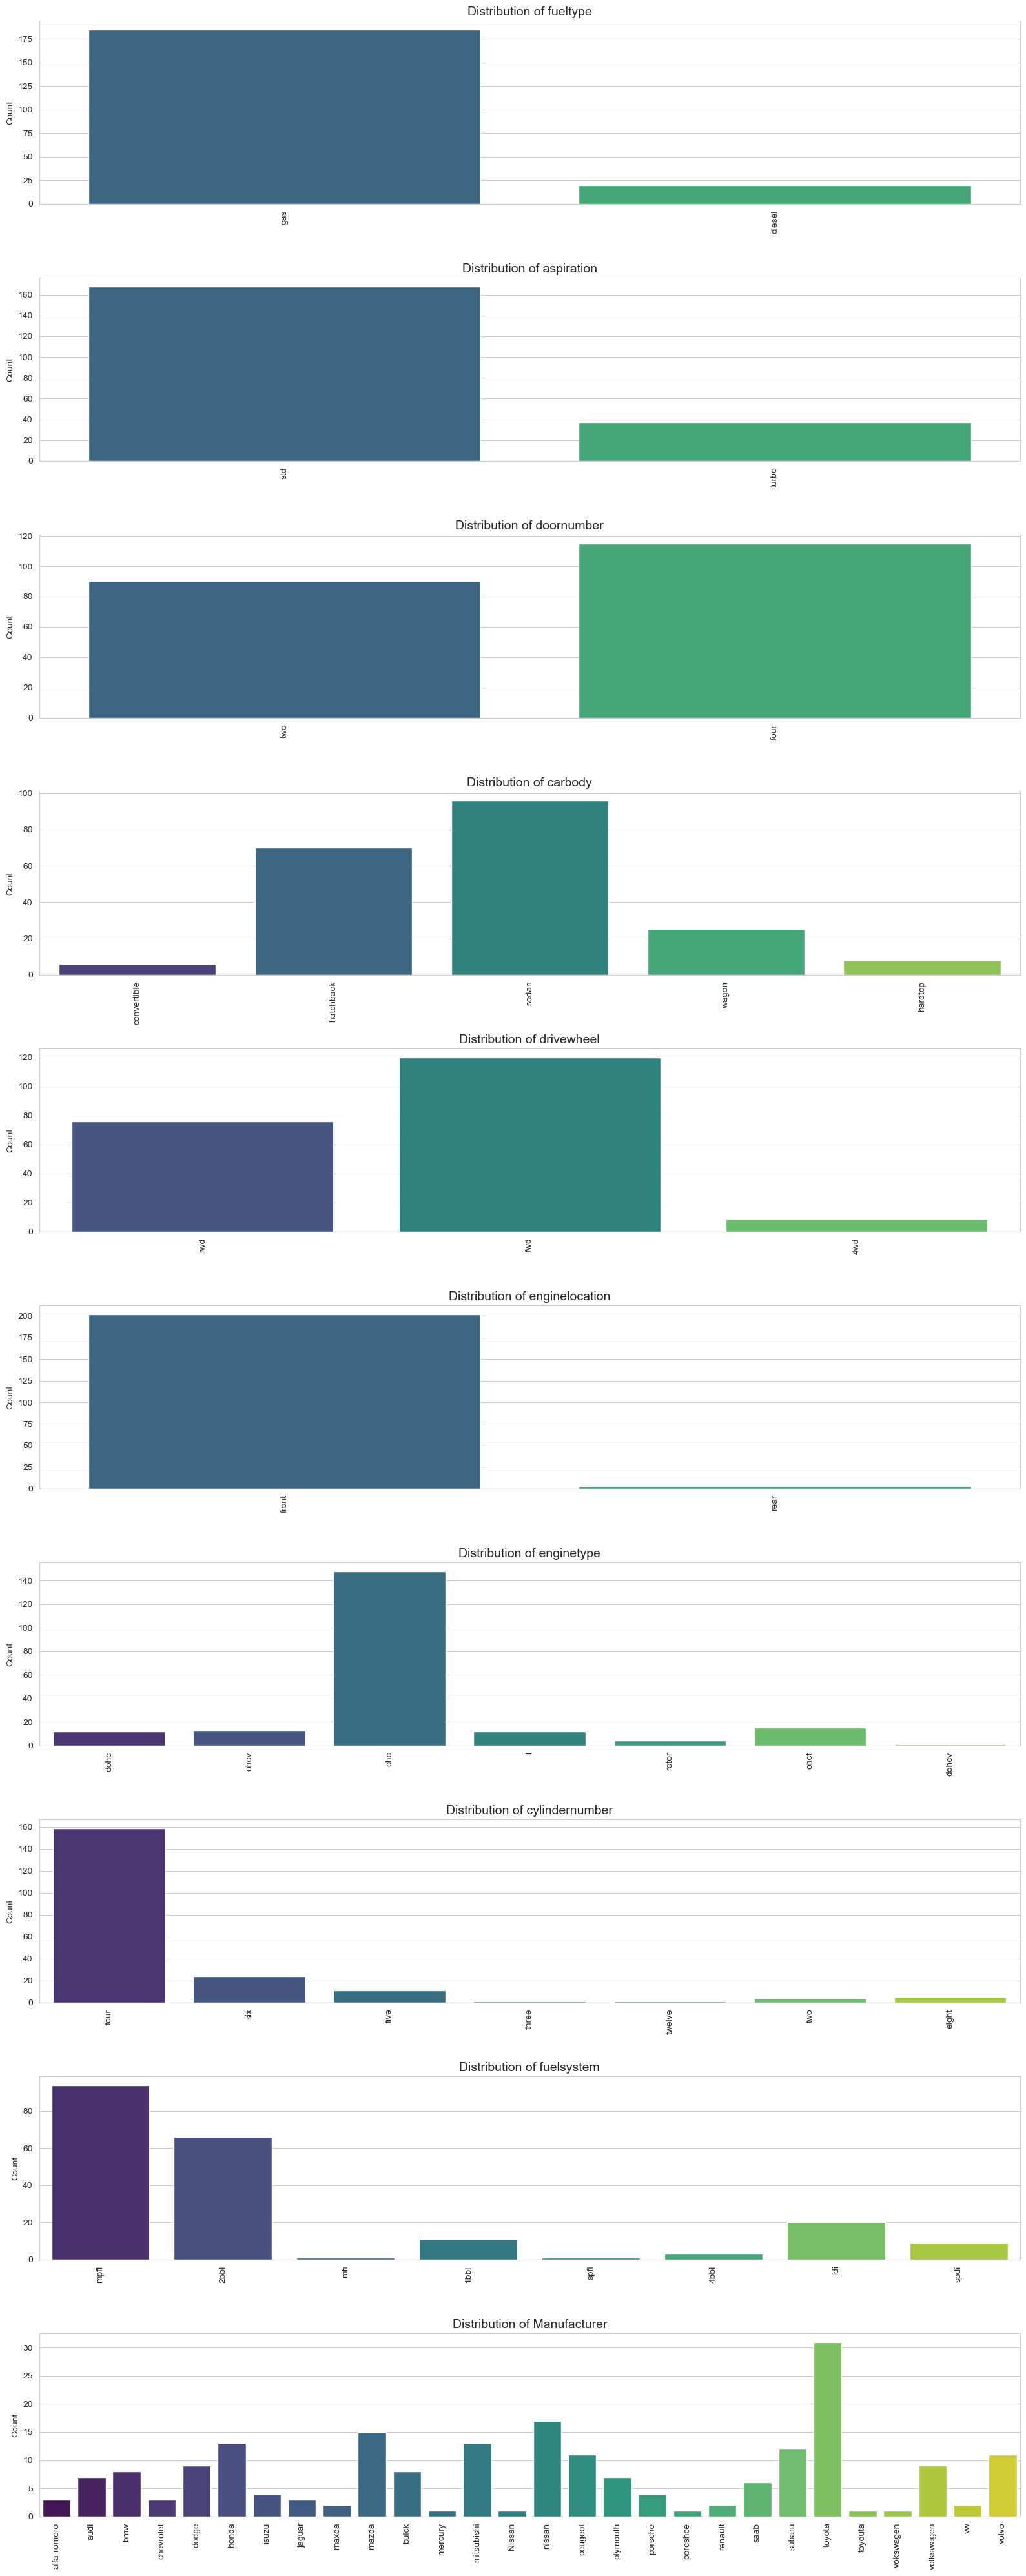

In [14]:
# Categorical data distribution
# Select categorical variables
df_cat = data.select_dtypes(include=['object'])

# Check if there are any categorical variables to plot
if df_cat.empty:
    print("No categorical variables to plot.")
else:
    # Set up the matplotlib figure
    fig, axes = plt.subplots(nrows=len(df_cat.columns), ncols=1, figsize=(16, 40))

    # If there is only one categorical variable, axes will not be an array
    if len(df_cat.columns) == 1:
        axes = [axes]

    # Plot each categorical variable
    for i, column in enumerate(df_cat.columns):
        ax = axes[i]
        sns.countplot(data=df_cat, x=column, hue=column, palette='viridis', ax=ax, legend=False)
        ax.set_title(f'Distribution of {column}', fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        for tick in ax.get_xticklabels():
            tick.set_rotation(90)

    plt.tight_layout()
    plt.show()

## Preprocessing

In [16]:
# Check for missing values
data.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Manufacturer        0
dtype: int64

In [17]:
# Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

In [18]:
scaler = StandardScaler()
data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']] = scaler.fit_transform(data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])


In [19]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model building

In [21]:
# Build the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict on the test set
y_pred = lm.predict(X_test)

In [23]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.618466581595762e+26
R-squared: -5.222629767522784e+18


## Model interpretation

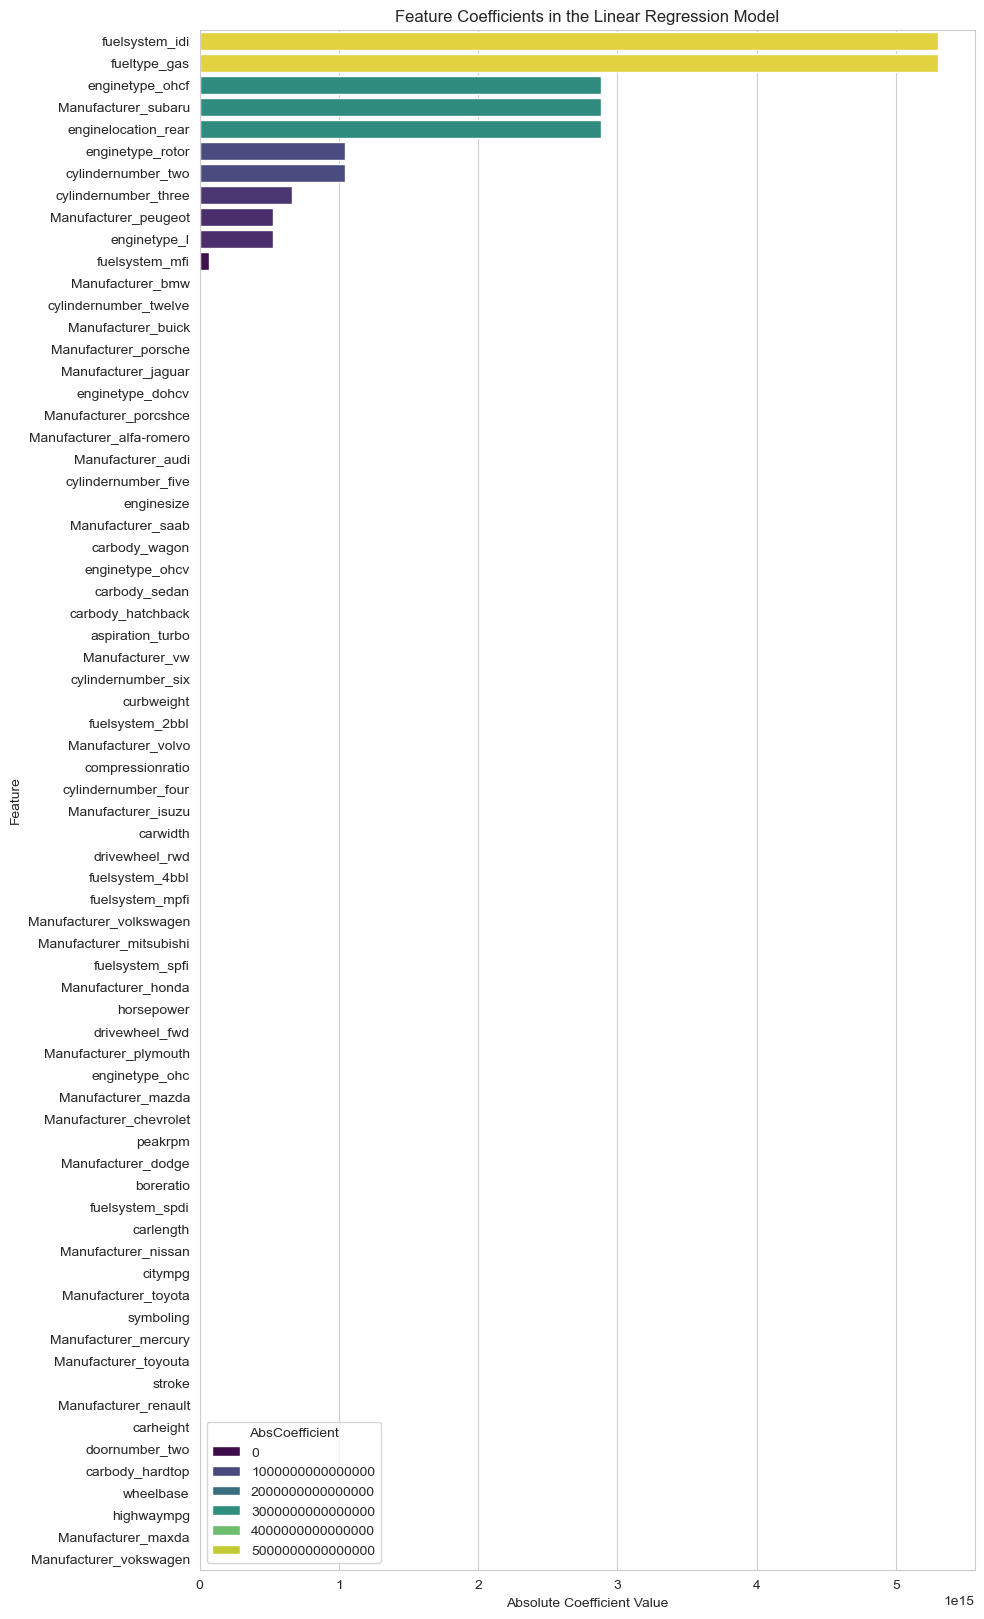

In [25]:
# Extracting model coefficients
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()

# Sort coefficients by absolute value
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 20))
sns.barplot(x=coefficients['AbsCoefficient'], hue=coefficients['AbsCoefficient'], y=coefficients.index, palette='viridis')
plt.title('Feature Coefficients in the Linear Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [26]:
# Displaying the most significant variables
print("Top 10 most significant variables:")
coefficients.head(10)

Top 10 most significant variables:


,Coefficient,AbsCoefficient
fuelsystem_idi,-5.299370e+15,5.299370e+15
fueltype_gas,-5.299370e+15,5.299370e+15
enginetype_ohcf,2.880495e+15,2.880495e+15
Manufacturer_subaru,-2.880495e+15,2.880495e+15
enginelocation_rear,-2.880495e+15,2.880495e+15
enginetype_rotor,1.045833e+15,1.045833e+15
cylindernumber_two,-1.045833e+15,1.045833e+15
cylindernumber_three,6.628443e+14,6.628443e+14
Manufacturer_peugeot,5.295079e+14,5.295079e+14
enginetype_l,-5.295079e+14,5.295079e+14
